## Parte guiada

#### Código generador de números aleatorios en Qiskit

In [1]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

# Usamos el qasm_simulator de Aer
simulator = Aer.get_backend('qasm_simulator')
# Creamos un objeto Quantum Circuit que actúa sobre el registro cuántico por defecto (q) 
# de un bit (primer parámetro) y que tiene un registro clásico de un bit (segundo parámetro)
circuit = QuantumCircuit(1, 1)
# Añadimos una puerta Hadamard con el qubit q_0 como entrada
circuit.h(0)
# Mapeamos la medida de los qubits (primer parámetro) sobre los bits clásicos
circuit.measure([0], [0])
# Ejecutamos el circuito sobre el simulador qasm
job = execute(circuit, simulator, shots=1000)
# Almacenamos los resultados
result = job.result()
# Capturamos las ocurrencias de salida
counts = result.get_counts(circuit)
# Escribimos el número de ocurrencias
print("\nNúmero de ocurrencias para 0 y 1:",counts)
# Dibujamos el circuito
circuit.draw()


Número de ocurrencias para 0 y 1: {'0': 479, '1': 521}


┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

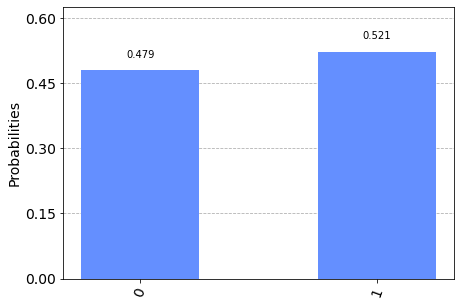

In [2]:
plot_histogram(counts)

## Parte no guiada

In [1]:
from qiskit import IBMQ

with open('qiskit.txt', 'r') as file:
	token = file.read()

# IBMQ.save_account(token, hub='ibm-q-education', group='uni-complutense-2', project='architecture-pro', overwrite=True)
IBMQ.save_account(token, overwrite=True)

In [ ]:
# from qiskit.providers.ibmq import least_busy

# provider = IBMQ.load_account()

# small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and not x.configuration().simulator)
# backend = least_busy(small_devices)

#### Ejercicio 1

In [8]:
from qiskit import QuantumRegister, ClassicalRegister,QuantumCircuit, execute, IBMQ, Aer
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')

def primerEstadoBell():
    circuit = QuantumCircuit(q,c)

    circuit.h(q[0]) # Hadamard gate 
    circuit.cx(q[0],q[1]) # CNOT gate
    circuit.measure(q,c) # Qubit Measurment

    print(circuit)

    job = execute(circuit, backend, shots=1000)
    
    job_monitor(job)
    counts = job.result().get_counts()

    print(counts)

def segundoEstadoBell():
    circuit = QuantumCircuit(q,c)

    circuit.x(q[0]) # Pauli-X gate 
    circuit.h(q[0]) # Hadamard gate 
    circuit.cx(q[0],q[1]) # CNOT gate
    circuit.measure(q,c) # Qubit Measurment

    print(circuit)

    job = execute(circuit, backend, shots=1000)
    
    job_monitor(job)
    counts = job.result().get_counts()

    print(counts)

def tercerEstadoBell():
    circuit = QuantumCircuit(q,c)

    circuit.x(q[1]) # Pauli-X gate 
    circuit.h(q[0]) # Hadamard gate 
    circuit.cx(q[0],q[1]) # CNOT gate
    circuit.measure(q,c) # Qubit Measurment

    print(circuit)

    job = execute(circuit, backend, shots=1000)
    
    job_monitor(job)
    counts = job.result().get_counts()

    print(counts)

def cuartoEstadoBell():
    circuit = QuantumCircuit(q,c)

    circuit.x(q[1]) # Pauli-X gate 
    circuit.h(q[0]) # Hadamard gate
    circuit.z(q[0]) # Pauli-Z gate
    circuit.z(q[1]) # Pauli-Z  gate 
    circuit.cx(q[0],q[1]) # CNOT gate
    circuit.measure(q,c) # Qubit Measurment

    print(circuit)

    job = execute(circuit, backend, shots=1000)
    
    job_monitor(job)
    counts = job.result().get_counts(circuit)

    print(counts)

available_simulators = Aer.backends()
for simulator in available_simulators[:3]:
    backend = Aer.get_backend(str(simulator))

    print("\nCorriendo en el simulador %s" % backend)
    print("Primer estado de Bell:\n")
    primerEstadoBell()
    # print("\nSegundo estado de Bell:\n")
    # segundoEstadoBell()
    # print("\nTercer estado de Bell:\n")
    # tercerEstadoBell()
    # print("\nCuarto estado de Bell:\n")
    # cuartoEstadoBell()


Corriendo en el simulador aer_simulator
Primer estado de Bell:

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
Job Status: job has successfully run
{'11': 509, '00': 491}

Corriendo en el simulador aer_simulator_statevector
Primer estado de Bell:

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
Job Status: job has successfully run
{'00': 488, '11': 512}

Corriendo en el simulador aer_simulator_density_matrix
Primer estado de Bell:

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
Job Status: job has successfully run
{'11': 511, '00': 489}


El numero de ocurrencias es muy parecido entre los 3 simuladores en los que se ha corrido el primer estado de Bell.

#### Ejercicio 2

In [10]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, IBMQ, Aer, transpile
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_bogota')

noise_model = NoiseModel.from_backend(backend)
coupling_map = backend.configuration().coupling_map
basis_gates = noise_model.basis_gates

print("\nCorriendo en el simulador %s" % backend)
print("Primer estado de Bell:\n")

q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')

circuit = QuantumCircuit(q, c)

circuit.h(q[0]) # Hadamard gate 
circuit.cx(q[0],q[1]) # CNOT gate
circuit.cx(q[1],q[2]) # CNOT gate
circuit.measure_all() # Qubit Measurment

transp_circ = transpile(circuit, backend)
job = execute(transp_circ, Aer.get_backend('qasm_simulator'), coupling_map=coupling_map, basis_gates=basis_gates, noise_model=noise_model).result()
counts = job.get_counts(circuit)
circuit.draw()

print(circuit)
print(counts)

ibmqfactory.load_account:WARNING:2022-02-21 19:58:33,376: Credentials are already in use. The existing account in the session will be replaced.



Corriendo en el simulador ibmq_bogota
Primer estado de Bell:

        ┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
   c: 3/═══════════════════╬══╬══╬═
                           ║  ║  ║ 
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2 
{'001 000': 16, '000 000': 458, '110 000': 47, '111 000': 405, '101 000': 38, '011 000': 27, '100 000': 11, '010 000': 22}


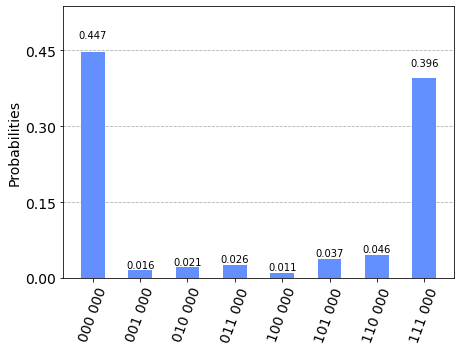

In [11]:
plot_histogram(counts)

En este circuito a diferencia del anterior, se ha añadido un qubit adicional y una puerta CNOT para cumplir los requisitos del estado GHZ. En cuanto a las ocurrencias, se ha visto que el estado GHZ tiene una ocurrencia más que el estado de Bell.

#### Ejercicio 3

In [13]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, IBMQ, Aer, transpile
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel

provider = IBMQ.load_account()
available_simulators = provider.backends()
for simulator in available_simulators[3:6]:
    backend = provider.get_backend(str(simulator))

    noise_model = NoiseModel.from_backend(backend)
    coupling_map = backend.configuration().coupling_map
    basis_gates = noise_model.basis_gates

    print("\nCorriendo en el simulador %s" % backend)
    print("Primer estado de Bell:\n")
    
    q = QuantumRegister(3,'q')
    c = ClassicalRegister(3,'c')

    circuit = QuantumCircuit(q, c)

    circuit.h(q[0]) # Hadamard gate 
    circuit.cx(q[0],q[1]) # CNOT gate
    circuit.cx(q[1],q[2]) # CNOT gate
    circuit.measure_all() # Qubit Measurment

    transp_circ = transpile(circuit, backend)
    job = execute(transp_circ, Aer.get_backend('qasm_simulator'), coupling_map=coupling_map, basis_gates=basis_gates, noise_model=noise_model).result()
    counts = job.get_counts(circuit)
    circuit.draw()

    print(circuit)
    print(counts)


ibmqfactory.load_account:WARNING:2022-02-21 20:03:43,449: Credentials are already in use. The existing account in the session will be replaced.



Corriendo en el simulador ibmq_bogota
Primer estado de Bell:

        ┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
   c: 3/═══════════════════╬══╬══╬═
                           ║  ║  ║ 
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2 
{'110 000': 38, '010 000': 29, '011 000': 23, '100 000': 6, '000 000': 486, '001 000': 16, '111 000': 400, '101 000': 26}

Corriendo en el simulador ibmq_lima
Primer estado de Bell:

        ┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
   c: 3/═══════════════════╬══╬══╬═
                           ║  ║  ║ 
meas: 3/═══════════════════╩══╩══╩

Los resultados obtenidos entre los distintos computadores son parecidos a los obtenidos en el ejercicio 2. Estos resultados son bastante parejos y se deben a que usamos o bien el mismo _backend_, o bien distintos _backends_ que tiene caracteristicas similares.

El _backend_ que aparentemente ofrece mejores numeros es `ibmq_bogota` ya que tiene unas caracteristicas parecidas al resto pero tiene un volumen cuántico (QV) superior.

#### Ejercicio 4

In [1]:
import boto3
from braket.circuits import Circuit, Noise
from braket.aws import AwsDevice

def GHZ(n_qubits: int) -> Circuit:
    circ = Circuit().h(0)                        

    for ii in range(0, n_qubits - 1):
        circ.cnot(control = ii, target = ii + 1)  
    return circ

circuit = GHZ(3)
# noise = Noise.BitFlip(probability=0.1)
# circuit.apply_gate_noise(noise)

device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/markelal/IONQ")

print(circuit)
print("Resultados: ", device.run(circuit, s3_folder).result().measurement_counts)

T  : |0|1|2|
            
q0 : -H-C---
        |   
q1 : ---X-C-
          | 
q2 : -----X-

T  : |0|1|2|
Resultados:  Counter({'111': 491, '000': 477, '100': 10, '011': 10, '001': 5, '110': 4, '101': 3})


Tras muchas horas de ejecución, se ha obtenido un resultado bastante parecido al resto de ejercicios con qiskit usando otros _backends_.